In [139]:
import matplotlib.pyplot as plt

from THESIS2019.PART1.TopicModel.LDA import lda_consistency as ldac


In [26]:
folder = "../../PART1/TopicModel/LDA/stm_data/"
freq_matrix = folder+"td_frequencies.csv"

folder = "../../PART1/TopicModel/LDA/stm_data/"
docfile = folder+"stm_data.csv"

In [60]:
import pandas as pd
import csv

df = pd.read_csv(freq_matrix)

In [29]:
docs = pd.read_csv(docfile)
docs

,documents,docname,rating,date,outlet
0,william bigelow feb egyptian salafi preacher a...,Egyptian Preacher: Raping Women in Tahrir Squa...,left,NaN,BREITBART2012-2013-processed
1,baro thatcher die morn follow stroke spokesman...,Long Live the Iron Lady! Margaret Thatcher Dies,left,2013-04-08 00:00:00,BREITBART2012-2013-processed
2,theologian claim elect pope franci histori per...,Pope Francis: Liberation Theologian?,left,NaN,BREITBART2012-2013-processed
3,sydney william feb alleg hilari rank greatest ...,"Thought of the Day: Kim-Jong-un, a Tinderbox",left,NaN,BREITBART2012-2013-processed
4,bipartisan comiti arm committe serv countri we...,Democrats Vow to Push Hagel Through; McCain Le...,left,2013-02-10 00:00:00,BREITBART2012-2013-processed
5,back german offici clown itali mcdonald franc ...,World View: China Moves Missiles Near Coast to...,left,2013-02-28 00:00:00,BREITBART2012-2013-processed
6,josiah cantral feb everyon happi minist decis ...,Obama Pressures Great Britain Not to Leave Eur...,left,NaN,BREITBART2012-2013-processed
7,bossi jan congressman frank wolf absolut right...,Select Committee Needed To Probe Benghazi Attacks,left,NaN,BREITBART2012-2013-processed
8,breitbart news ben shapiro report thursday sou...,"Saad Hariri: 'Friend' of Hamas, Supporter of H...",left,2013-02-07 00:00:00,BREITBART2012-2013-processed
9,russian politician blame meteorit unit state c...,World View: Egypt Continues to Become More Uns...,left,NaN,BREITBART2012-2013-processed


In [87]:
from collections import defaultdict

outlet_starts = []
curr_outlet = docs.iloc[0]["outlet"]
outlet_names=[curr_outlet]
for i,row in docs.iterrows():
    if row["outlet"] != curr_outlet:
        curr_outlet = row["outlet"]
        outlet_starts.append(i)
        outlet_names.append(row["outlet"])

In [67]:
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)
df


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,0.000398,0.983765,0.000606,0.000265,0.000584,0.000868,0.000653,0.000454,0.000459,0.000916,...,0.000711,0.000105,0.000889,0.000527,0.000522,0.001689,0.000243,0.000568,0.000110,0.000355
1,0.001121,0.000185,0.000292,0.000193,0.000276,0.991809,0.000064,0.000475,0.001164,0.000167,...,0.000500,0.000117,0.000372,0.000190,0.000024,0.000057,0.000419,0.000168,0.000541,0.000085
2,0.002620,0.000545,0.000287,0.001233,0.000268,0.656411,0.000619,0.001716,0.040123,0.000373,...,0.001750,0.001104,0.001205,0.001227,0.000093,0.000095,0.005065,0.001481,0.276981,0.000405
3,0.000128,0.002584,0.000172,0.000180,0.000037,0.000197,0.000352,0.000151,0.000375,0.000119,...,0.000116,0.000237,0.000040,0.000102,0.000247,0.000644,0.000022,0.000164,0.000224,0.000325
4,0.001050,0.005066,0.001114,0.002129,0.000514,0.000123,0.783766,0.000542,0.000651,0.000662,...,0.001981,0.001485,0.000284,0.002040,0.000612,0.005671,0.000450,0.000400,0.000493,0.000177
5,0.000062,0.000657,0.000136,0.000084,0.000037,0.000387,0.000249,0.000058,0.000373,0.000203,...,0.000173,0.000115,0.000054,0.000051,0.000179,0.000509,0.000041,0.000110,0.000115,0.000399
6,0.000315,0.000051,0.000636,0.000158,0.000282,0.000226,0.000027,0.996372,0.000510,0.000003,...,0.000007,0.000038,0.000212,0.000237,0.000007,0.000009,0.000014,0.000181,0.000014,0.000028
7,0.001085,0.020794,0.005687,0.001569,0.000677,0.000165,0.029452,0.000555,0.000433,0.001102,...,0.002038,0.095592,0.001637,0.001626,0.001289,0.227665,0.000563,0.001020,0.000888,0.000230
8,0.000265,0.525041,0.001597,0.001035,0.000744,0.000108,0.118498,0.000329,0.000294,0.000873,...,0.001895,0.000797,0.000744,0.000801,0.000970,0.072301,0.000193,0.000539,0.000214,0.000138
9,0.000649,0.958799,0.031232,0.000233,0.000891,0.000302,0.000133,0.000856,0.000470,0.000090,...,0.000192,0.000052,0.000326,0.000299,0.000364,0.001825,0.000163,0.000057,0.000004,0.000087


In [150]:
import numpy as np

# dataframe chunked by outlet
idx = np.cumsum(np.in1d(np.arange(len(df.index)), outlet_starts))
chunks = dict((outlet_names[i],chunk) for i,chunk in df.groupby(idx))

distros = defaultdict(lambda:0)
for name, chunk in chunks.items():
    # sum columns in dataframe chunk
    distro = dict(chunk.sum())
    #normalize distro
    total = sum(distro.values())
    norm = {int(k[1:]):v/total for k,v in distro.items()}
    print(norm)
    distros[name] = norm

{1: 0.00697674474199349, 2: 0.13055704052522304, 3: 0.04184022724106897, 4: 0.015625061679598935, 5: 0.0011323648799583252, 6: 0.10707223199475782, 7: 0.05868056871661389, 8: 0.059342991905842746, 9: 0.0020679883283061438, 10: 0.030548375561637683, 11: 0.10618247086906887, 12: 0.0008761567764495283, 13: 0.00046581185929868787, 14: 0.021060729330215258, 15: 0.0010078452930081523, 16: 0.013520956666654928, 17: 0.0005291472248048465, 18: 0.27920817158415623, 19: 0.0012920845443177738, 20: 0.0003707320764379589, 21: 0.003117809208014985, 22: 0.003852083779278148, 23: 0.0016537455537788102, 24: 0.0041377729030092686, 25: 0.02842255021918049, 26: 0.040008623658544074, 27: 0.0008547434455073123, 28: 0.00032748346657065667, 29: 0.03783659686166763, 30: 0.00143088910503534}
{1: 0.06980508590589139, 2: 0.020080710761046984, 3: 0.06457150337604671, 4: 0.01808299152560635, 5: 0.0349933150780488, 6: 0.042769353883309796, 7: 0.06747413150087087, 8: 0.04141466824723748, 9: 0.05352449251783189, 10: 0.

In [163]:
def graph_distribution(dist, title):
    x, y = dist.keys(), dist.values()
    fig, ax = plt.subplots()

    plt.bar(x, y, alpha=0.5)
    plt.xlabel('Topic number')
    plt.ylabel('Proportion in document set')
    plt.title('Topic distribution for %s' %(title))

    plt.show()

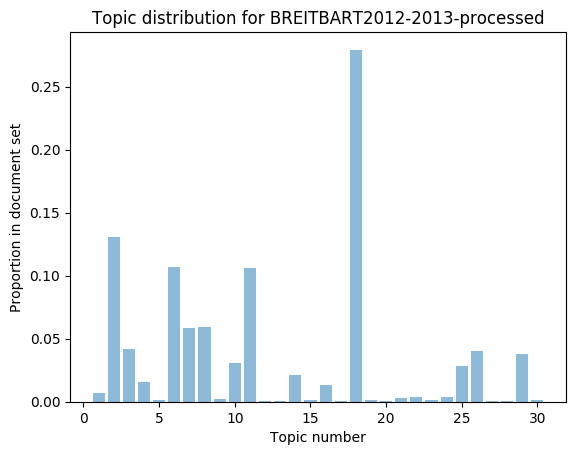

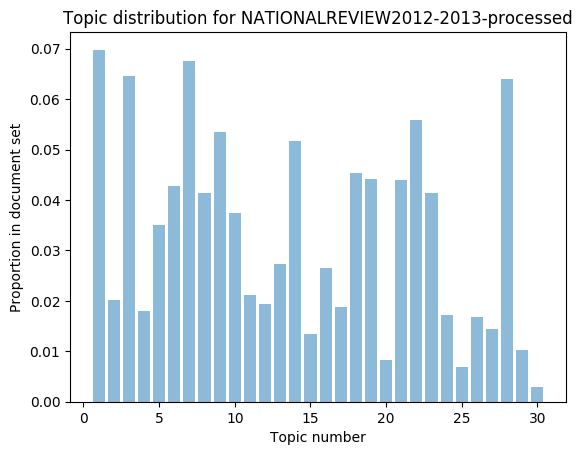

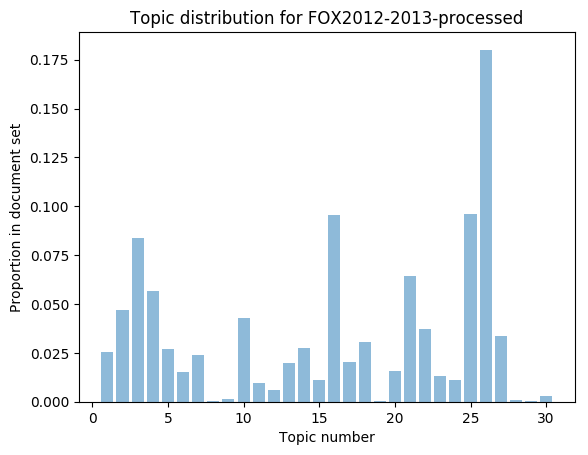

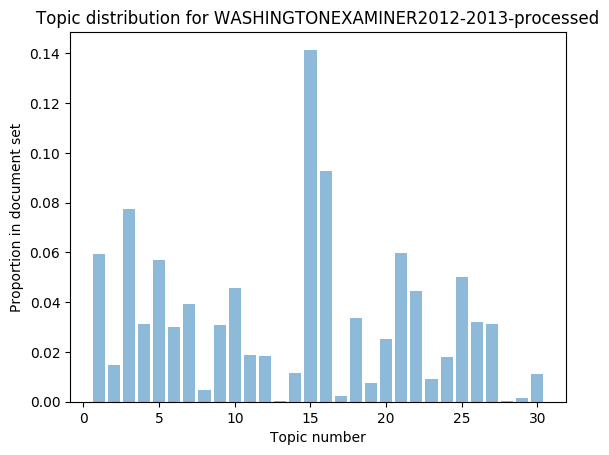

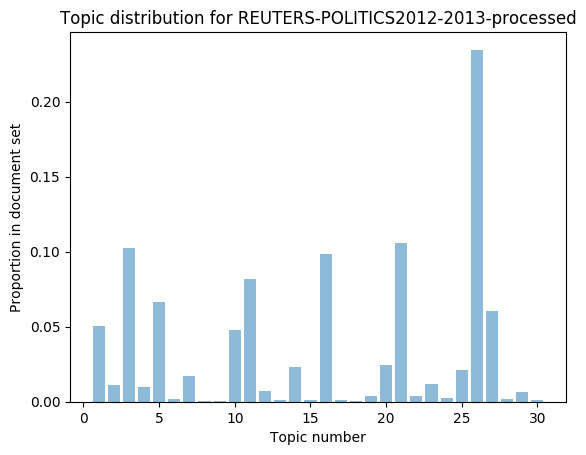

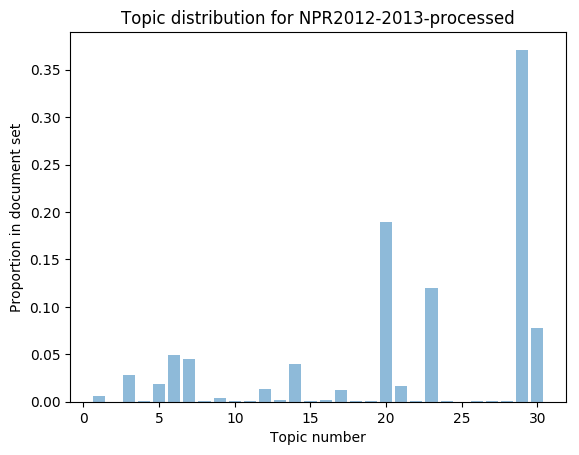

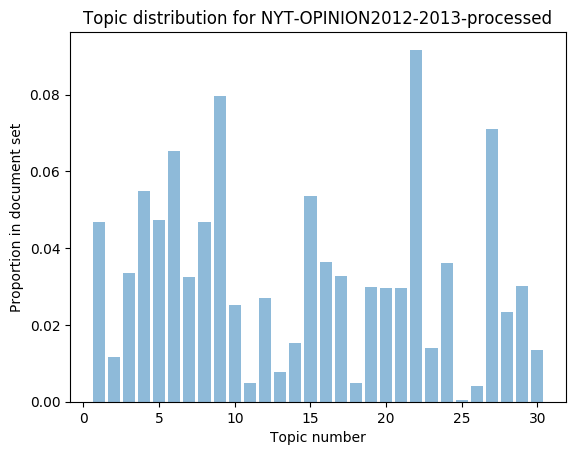

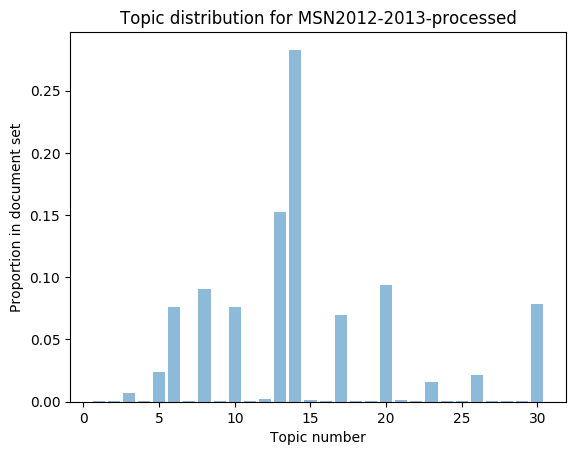

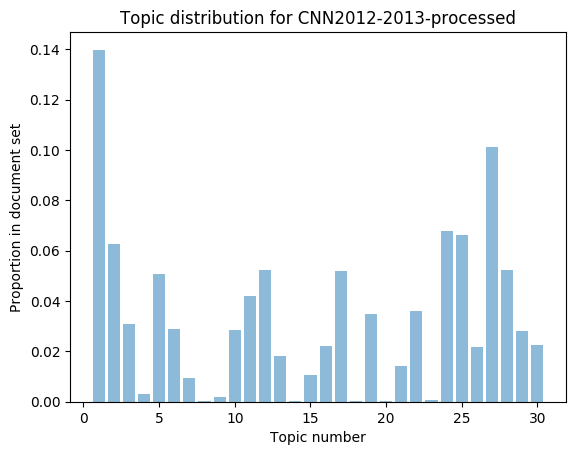

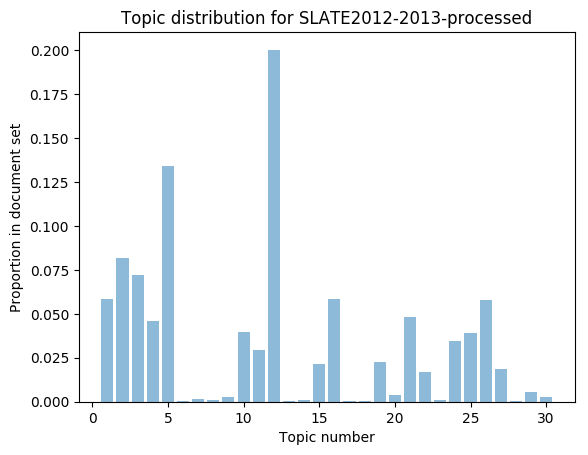

In [164]:
for k,v in distros.items():
    graph_distribution(v,k)


In [165]:
jsd = ldac.compare_topic_distributions([v for k,v in distros.items()])

In [166]:
jsd

0.9031679677757642

In [167]:
df_outlet = pd.DataFrame(distros)
df_outlet

,BREITBART2012-2013-processed,NATIONALREVIEW2012-2013-processed,FOX2012-2013-processed,WASHINGTONEXAMINER2012-2013-processed,REUTERS-POLITICS2012-2013-processed,NPR2012-2013-processed,NYT-OPINION2012-2013-processed,MSN2012-2013-processed,CNN2012-2013-processed,SLATE2012-2013-processed
1,0.006977,0.069805,0.025298,0.059548,0.050563,0.005603,0.046825,0.000857,0.139848,0.058320
2,0.130557,0.020081,0.046722,0.014673,0.011279,0.000154,0.011706,0.000367,0.062765,0.081557
3,0.041840,0.064572,0.084024,0.077624,0.102211,0.028008,0.033606,0.006961,0.030702,0.072191
4,0.015625,0.018083,0.056701,0.031206,0.009848,0.000464,0.055010,0.000715,0.003069,0.045781
5,0.001132,0.034993,0.027203,0.057141,0.066258,0.018855,0.047212,0.023656,0.050860,0.134349
6,0.107072,0.042769,0.015329,0.030205,0.001751,0.048841,0.065179,0.076263,0.028925,0.000599
7,0.058681,0.067474,0.023908,0.039143,0.017060,0.044609,0.032522,0.000187,0.009556,0.001623
8,0.059343,0.041415,0.000298,0.004658,0.000210,0.000757,0.046743,0.090925,0.000236,0.001012
9,0.002068,0.053524,0.001644,0.030730,0.000434,0.003474,0.079761,0.000691,0.002024,0.002782
10,0.030548,0.037327,0.043000,0.045809,0.047625,0.000373,0.025279,0.075978,0.028603,0.039448


In [168]:
df_outlet=df_outlet.T
df_outlet

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
BREITBART2012-2013-processed,0.006977,0.130557,0.041840,0.015625,0.001132,0.107072,0.058681,0.059343,0.002068,0.030548,...,0.003118,0.003852,0.001654,0.004138,0.028423,0.040009,0.000855,0.000327,0.037837,0.001431
NATIONALREVIEW2012-2013-processed,0.069805,0.020081,0.064572,0.018083,0.034993,0.042769,0.067474,0.041415,0.053524,0.037327,...,0.043964,0.055955,0.041335,0.017216,0.006856,0.016715,0.014496,0.064085,0.010185,0.002935
FOX2012-2013-processed,0.025298,0.046722,0.084024,0.056701,0.027203,0.015329,0.023908,0.000298,0.001644,0.043000,...,0.064252,0.036976,0.012975,0.011161,0.096026,0.180147,0.033400,0.000737,0.000505,0.002770
WASHINGTONEXAMINER2012-2013-processed,0.059548,0.014673,0.077624,0.031206,0.057141,0.030205,0.039143,0.004658,0.030730,0.045809,...,0.059911,0.044445,0.009000,0.018112,0.050124,0.031924,0.031431,0.000304,0.001397,0.011210
REUTERS-POLITICS2012-2013-processed,0.050563,0.011279,0.102211,0.009848,0.066258,0.001751,0.017060,0.000210,0.000434,0.047625,...,0.105718,0.004096,0.012048,0.002518,0.020962,0.234688,0.060563,0.001547,0.006359,0.001022
NPR2012-2013-processed,0.005603,0.000154,0.028008,0.000464,0.018855,0.048841,0.044609,0.000757,0.003474,0.000373,...,0.016767,0.000601,0.119970,0.000520,0.000225,0.001235,0.000597,0.000566,0.371138,0.077459
NYT-OPINION2012-2013-processed,0.046825,0.011706,0.033606,0.055010,0.047212,0.065179,0.032522,0.046743,0.079761,0.025279,...,0.029627,0.091686,0.014040,0.036053,0.000346,0.004189,0.070933,0.023458,0.030243,0.013599
MSN2012-2013-processed,0.000857,0.000367,0.006961,0.000715,0.023656,0.076263,0.000187,0.090925,0.000691,0.075978,...,0.001422,0.000452,0.015700,0.000547,0.000292,0.021783,0.000275,0.000702,0.000419,0.078169
CNN2012-2013-processed,0.139848,0.062765,0.030702,0.003069,0.050860,0.028925,0.009556,0.000236,0.002024,0.028603,...,0.014127,0.036185,0.000754,0.067838,0.066106,0.021636,0.101164,0.052354,0.027970,0.022594
SLATE2012-2013-processed,0.058320,0.081557,0.072191,0.045781,0.134349,0.000599,0.001623,0.001012,0.002782,0.039448,...,0.048474,0.017140,0.001209,0.034315,0.039281,0.057630,0.018472,0.000325,0.005257,0.002834


In [171]:
normstds=[]
for col in df_outlet.columns.values:
    std = df_outlet.loc[:,col].std()
    mean = df_outlet.loc[:,col].mean()
    normstd = std/mean
    normstds.append((col,normstd))
#     print("topic %d has norm std %f" %(col, (std/mean)))
# df.loc[:,12].mean()

srtd = sorted(normstds, key=lambda x:x[1], reverse=True)
for s in srtd:
    print("topic %d = %f" %(s[0], s[1]))
#     print (" ".join([w for w,p in model.show_topic(s[0])]))
    print()
    

topic 29 = 2.319776

topic 18 = 2.174399

topic 13 = 2.030301

topic 14 = 1.778107

topic 12 = 1.735874

topic 15 = 1.713511

topic 28 = 1.683142

topic 9 = 1.581739

topic 23 = 1.577620

topic 20 = 1.522689

topic 30 = 1.425593

topic 8 = 1.335396

topic 26 = 1.310533

topic 19 = 1.152569

topic 17 = 1.140377

topic 11 = 1.140346

topic 2 = 1.119392

topic 24 = 1.115960

topic 25 = 1.047938

topic 27 = 1.030916

topic 22 = 1.024745

topic 4 = 0.934467

topic 1 = 0.890758

topic 16 = 0.873532

topic 21 = 0.840473

topic 6 = 0.813259

topic 5 = 0.793862

topic 7 = 0.787068

topic 3 = 0.557894

topic 10 = 0.515204



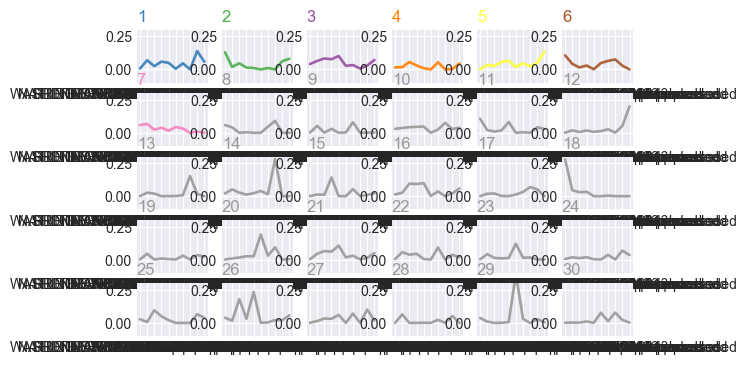

In [173]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# multiple line plot
num=0
for column in df_outlet:
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(6,6, num)
 
    # Plot the lineplot
    x = df_outlet.index.values
    plt.plot(x, df_outlet[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
#     plt.xlim(0,30)
    plt.ylim(-.1,.3)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    
    if num==30:
        break
 


12
5


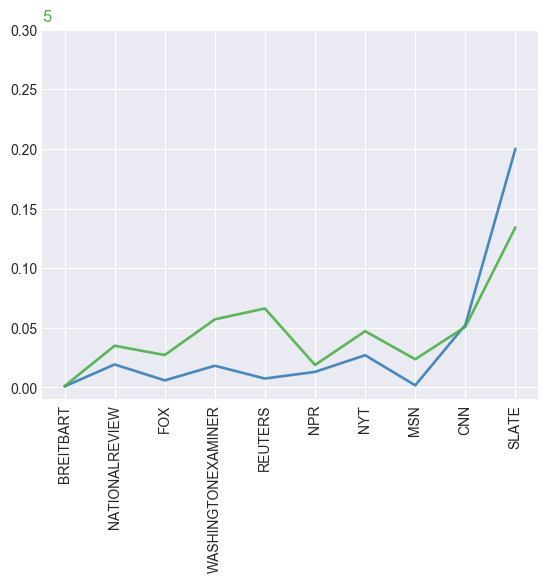

In [201]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# multiple line plot
num=0
for column in [12,5]:
    print(column)
    num+=1
 
    # Find the right spot on the plot
#     plt.subplot(2,2, num)
    
    # Plot the lineplot
#     x = df_outlet.index.values
    x = [("").join([c for c in v.split("-")[0] if c.isalpha()]) for v in df_outlet.index.values]
    plt.plot(x, df_outlet[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
#     plt.xlim(0,30)
    plt.ylim(-0.01,.3)
    plt.xticks(rotation=90)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    
    if num==30:
        break

18
3
21


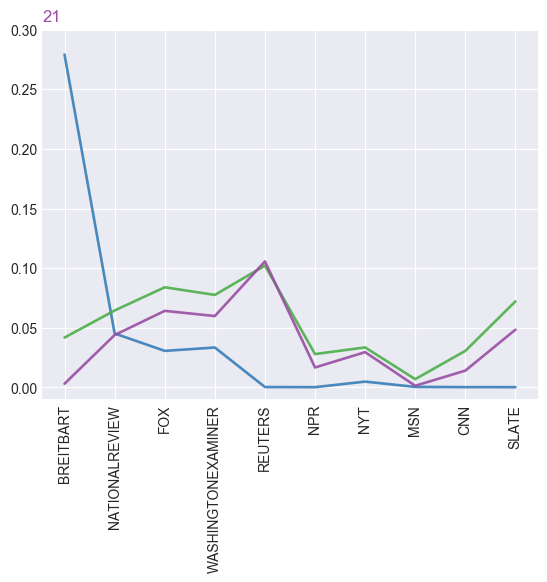

In [203]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# multiple line plot
num=0
for column in [18,3,21]:
    print(column)
    num+=1
 
    # Find the right spot on the plot
#     plt.subplot(2,2, num)
    
    # Plot the lineplot
#     x = df_outlet.index.values
    x = [("").join([c for c in v.split("-")[0] if c.isalpha()]) for v in df_outlet.index.values]
    plt.plot(x, df_outlet[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
#     plt.xlim(0,30)
    plt.ylim(-0.01,.3)
    plt.xticks(rotation=90)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    
    if num==30:
        break

25


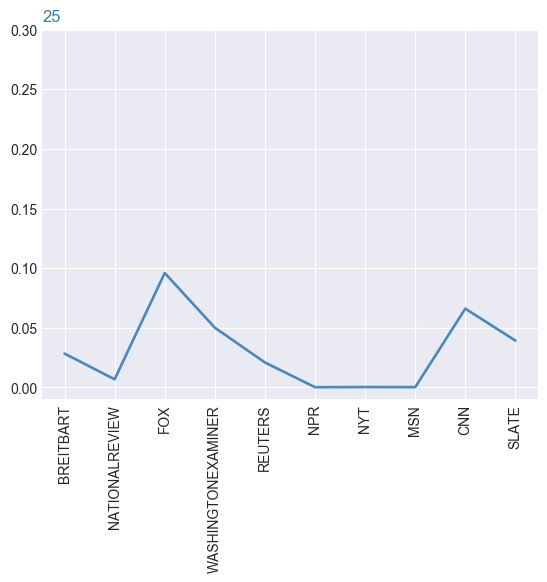

In [204]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# popular on the extremes - gun control
# multiple line plot
num=0
for column in [25]:
    print(column)
    num+=1
 
    # Find the right spot on the plot
#     plt.subplot(2,2, num)
    
    # Plot the lineplot
#     x = df_outlet.index.values
    x = [("").join([c for c in v.split("-")[0] if c.isalpha()]) for v in df_outlet.index.values]
    plt.plot(x, df_outlet[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
#     plt.xlim(0,30)
    plt.ylim(-0.01,.3)
    plt.xticks(rotation=90)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    
    if num==30:
        break